In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
cust_df = pd.read_csv('./data/Mall_Customers.csv')

In [4]:
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
cust_df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
cust_df.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
156,157,Male,37,78,1
134,135,Male,20,73,5
170,171,Male,40,87,13


In [7]:
cust_df.shape

(200, 5)

In [8]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
cust_df.isna().sum()#isnull()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# cust_df['Gender'] = le.fit_transform(cust_df['Gender'])

In [11]:
# cust_df.head()

Annual income and spending score column

In [12]:
X = cust_df.iloc[:,[3,4]].values

In [13]:
# print(X)

Choosing Cluster no.<br>WCSS
-withinclusterssumofsquares

In [14]:
wcss= []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=5)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)


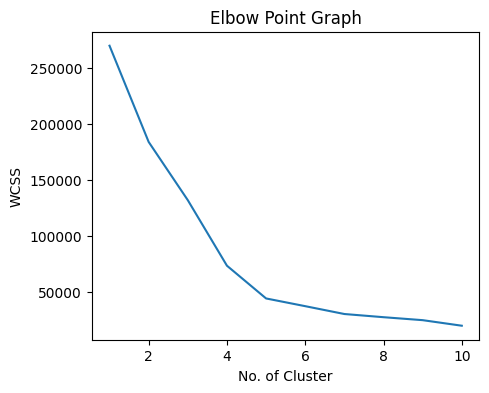

In [15]:
#elbow graph
plt.figure(figsize=(5,4))
plt.plot(range(1,11),wcss)
plt.title('Elbow Point Graph')
plt.xlabel('No. of Cluster')
plt.ylabel('WCSS')
plt.show()

In [16]:
#the optimal number of clusters will be 5
#MODEL
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=10)
Y = kmeans.fit_predict(X)
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


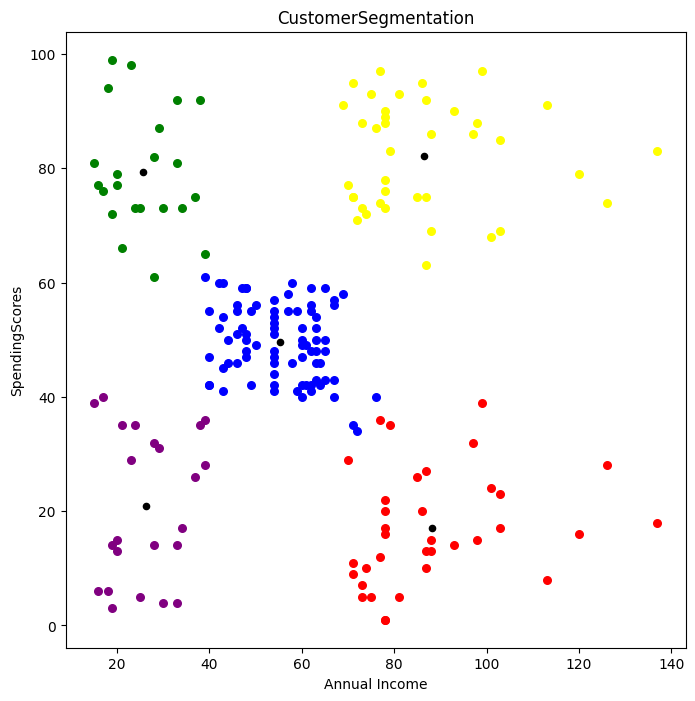

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=30,c='red',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=30,c='blue',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=30,c='green',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=30,c='yellow',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=30,c='purple',label='Cluster 5')

#centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=20,c='black',label='centroid')
plt.title('CustomerSegmentation')
plt.xlabel('Annual Income')
plt.ylabel('SpendingScores')
plt.show()

In [18]:
import pickle
with open('./models/kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)